In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import pickle
import random
import gzip

In [73]:
path_to_test_file="/Users/rakadalal/Desktop/Loan Prediction/test.csv"

df = pd.read_csv(path_to_test_file)#Reading the dataset in a dataframe using Pandas

In [74]:
# looking at missing values in all the variables
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [75]:
# Frequency distribution of Gender variable
df['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [76]:
# Frequency distribution of Dependents variable
df['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [77]:
# Frequency distribution of Self_Employed variable
df['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [78]:
# Since ~89% values of Self_Employed are “No”, I am imputing the missing values as “No”
df['Self_Employed'].fillna('No',inplace=True)

In [79]:
# Pivot table to provide median values for all the groups of unique values of Self_Employed and Education features.
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [80]:
# Filling missing values of all variables
# Since ~80% values of Gender are “Male”, I am imputing the missing values as “Male”
df['Gender'].fillna('Male', inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

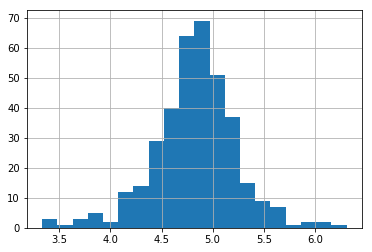

In [81]:
# Treating extreme values of LoanAmount by log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
plt.show()

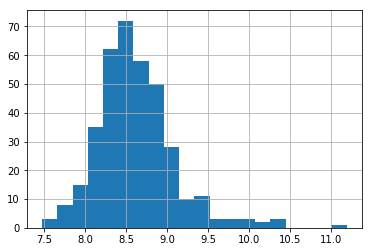

In [82]:
# Combining ApplicantIncome and CoapplicantIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# Treating extreme values of TotalIncome by log transformation
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 
plt.show()

In [83]:
# Converting all categorical variables into numeric by encoding the categories
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [84]:
path_to_model="./"
f = gzip.open(path_to_model+'model.pklz','rb')
model = pickle.load(f)
f.close()

In [85]:
predictor_var = ['Credit_History','TotalIncome_log', 'LoanAmount_log', 'Dependents', 'Property_Area', 'Loan_Amount_Term']
outcome = model.predict(df[predictor_var])

In [86]:
outcome

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [87]:
df_submission = pd.DataFrame({'Loan_ID':df['Loan_ID'], 'Loan_Status':outcome})
df_submission.loc[df_submission['Loan_Status'] == 1, 'Loan_Status'] = 'Y'
df_submission.loc[df_submission['Loan_Status'] == 0, 'Loan_Status'] = 'N'

In [88]:
df_submission.head(30)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [89]:
df_submission.to_csv('Sample_Submission.csv', encoding='utf-8')